 # Лабораторная работа №1

## Задание 1

Игроки А и В записывают цифры 1 и 2. Игра состоит в том, что, кроме своей цифры каждый игрок записывает еще и ту цифру, которую по его мнению, записал соперник. Если оба игрока угадали или оба ошиблись, то партия заканчивается вничью; если же угадал только один, то он получает столько очков, какова сумма записанных им цифр. 

### Платежная матрица игры
\begin{equation}
  A = \begin{bmatrix}
    0 & 2 & -3 & 0 \\
    -2 &  0 &  0  & 3 \\
    3 & 0 & 0 & -4 \\
    0 &-3 & 4 & 0
  \end{bmatrix}
\end{equation}

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
A = np.array([[0, 2, -3, 0],
              [-2, 0, 0, 3],
              [3, 0, 0, -4],
              [0, -3, 4, 0]])

Точная нижняя цена игры: {{np.max(np.min(A, axis = 1))}}

Точная верхняя цена игры {{np.min(np.max(A, axis = 0))}}

In [4]:
x = linprog(-np.ones(4), A+4, np.ones(4))
v = -1/x['fun']
p = x['x']*v

In [5]:
x = linprog(np.ones(4), -A.T-4, -np.ones(4))
v = 1/x['fun']
q = x['x']*v
v_ = np.sum((A*p).T*q)

Оптимальная стратегия игрока A: {{p}}

Оптимальная стратегия игрока B: {{q}}

Цена игры: {{v_}}

In [6]:
def map_func(a):
    return (a[0]-1)*2 + a[1]-1

def game1(A, a, b, av, bv):
    av += A[map_func(b), map_func(a)]
    bv -= A[map_func(b), map_func(a)]
    return av, bv

Случайный выбор стратегий

In [7]:
c = [(1,1), (1,2), (2,1), (2,2)]
score_list = []
for t in range(100):
    av, bv = 0, 0
    for i in range(1000):
        av, bv = game1(A, c[np.random.randint(0,3)], c[np.random.randint(0,3)], av, bv)
    score_list.append(av)


первый игрок выбирает стратегию случайно, второй использует равновероятно, первую и вторую 

In [8]:
def f():
    return int(np.random.rand(1)>0.6)

score_list1 = []
for t in range(100):
    av, bv = 0, 0
    for i in range(1000):
        av, bv = game1(A, c[np.random.randint(0,3)], c[f()], av, bv)
    score_list1.append(av)

In [9]:
def f():
    return int(np.random.rand(1)>0.6)
score_list2 = []
for t in range(100):
    av, bv = 0, 0
    for i in range(1000):
        av, bv = game1(A, c[f()], c[f()], av, bv)
    score_list2.append(av)

<IPython.core.display.Javascript object>


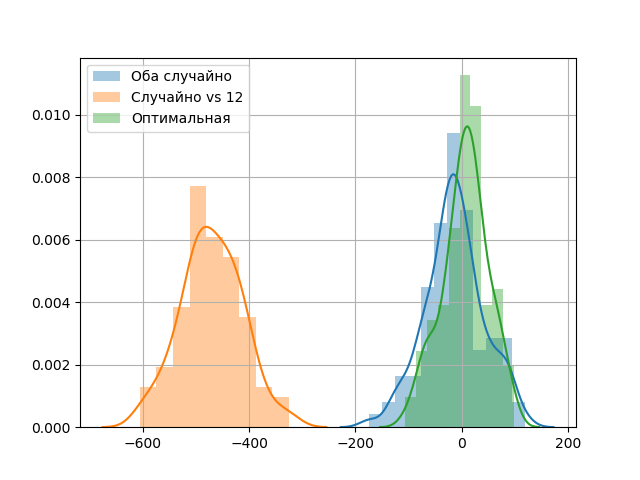

C:\Users\nikita\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
plt.figure()
plt.grid()
sns.distplot(score_list)
sns.distplot(score_list1)
sns.distplot(score_list2)
plt.legend(['Оба случайно', 'Случайно vs 12', 'Оптимальная'])

## Задание 2

Конкурирующие фирмы А и В производят однородный сезонный товар, пользующийся спросом в течение n единиц времени. Доход от продажи товара в единицу времени составляет С ден. ед. Фирма В, будучи более состоятельной, в ходе конкурентной борьбы стремится вытеснить фирму А с рынка сбыта, способствуя своими действиями минимизации ее дохода, не считаясь при этом с временными потерями части своего дохода в надежде наверстать упущенное в будущем. Действующее законодательство не позволяет использовать для этого заведомое занижение цены на товар (прибегать к демпинговым ценам). Единственным допустимым способом достижения своей цели для фирмы В (как и для фирмы А в целях защиты своих интересов на рынке сбыта) остается повышение качества товара и надлежащий выбор момента времени поставки его на рынок сбыта. Уровень спроса на товар зависит от его качества, и в данный момент реализуется тот товар, качество которого выше. Повышение же качества требует дополнительных затрат времени на совершенствование технологии его изготовления и переналадку оборудования. Поэтому будем предполагать, что качество товара тем выше, чем позже он поступает на рынок.

Таким образом стратегии для фирм А и В связаны с выбором моментов i и j предложения своего товара на рынок сбыта. А, выбирая момент i, стремится максимизировать свой доход. В преследует прямо противоположную цель – минимизировать доход игрока А. 

Составить платежную матрицу игры для n=5 и С=100.

### Платежная матрица игры


$$ A = \begin{bmatrix}
    250 & 100 & 200 & 300 & 400 \\
    400 & 200 & 100 & 200 & 300 \\
    300 & 300 & 150 & 100 & 200 \\
    200 & 200 & 200 & 100 & 100 \\
    100 & 100 & 100 & 100 & 50
   \end{bmatrix}$$

In [16]:
A2 = np.array([[250, 100, 200, 300, 400],
               [400, 200, 100, 200, 300],
               [300, 300, 150, 100, 200],
               [200, 200, 200, 100, 100],
               [100, 100, 100, 100, 50 ]])

Точная нижняя цена игры: {{np.max(np.min(A2, axis = 1))}}

Точная верхняя цена игры {{np.min(np.max(A2, axis = 0))}}

In [18]:
x = linprog(-np.ones(5), A2, np.ones(5))
v = -1/x['fun']
p = x['x']*v

In [17]:
x = linprog(np.ones(5), -A2.T, -np.ones(5))
v = 1/x['fun']
q = x['x']*v

In [19]:
v_ = np.sum((A2*p).T*q)

Цена игры: {{v_}}

Оптимальная стратегия игрока A: {{p}}

Оптимальная стратегия игрока B: {{q}}

In [20]:
score_list = []
for i in range(100):
    A_score = 0
    for j in range(100):
        A_score += A2[np.random.randint(0,4), np.random.randint(0,4)]
    score_list.append(A_score)

In [21]:
score_list1 = []
for i in range(100):
    A_score = 0
    for j in range(100):
        A_score += A2[np.argmax(np.cumsum(p)>np.random.rand(1)),
                      np.argmax(np.cumsum(q)>np.random.rand(1))]
    score_list1.append(A_score)

<IPython.core.display.Javascript object>


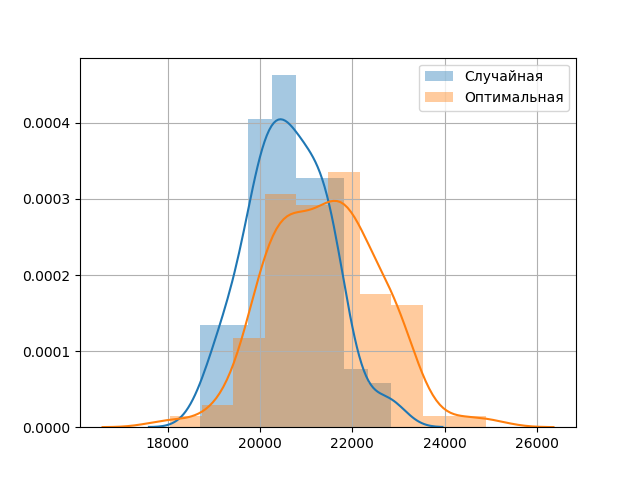

In [22]:
plt.figure()
plt.grid()
sns.distplot(score_list)
sns.distplot(score_list1)
plt.legend(['Cлучайная', 'Оптимальная'])

## Задание 3.


Задача 3. Для отопления коттеджа в зимний период используется уголь, цена на который зависит от времени года и характера зимы. Летом тонна угля стоит 7.5 ден. ед., в мягкую зиму – 8.5, в обычную – 9.0, а в холодную – 9.5. Расход угля в отопительный сезон полностью определяется характером зимы: на мягкую зиму достаточно 6 тонн, на обычную требуется 7, а в холодную расходуется 8. Арендатор может запасать топливо с лета и, в случае необходимости, пополнять его зимой. Однако продать неиспользованный уголь возможности не будет.

Составить платежную матрицу игры арендатора с “природой”.

### Платежная матрица игры

$$ A = \begin{matrix}
    - & мягкая & обычная & холодная \\
    6т-Летом & -45   & -54   & -63.5 \\
    7т-Летом & -52.5 & -52.5 & -62 \\ 
    8т-Летом & -60   &   -60 & -60 \\
    \end{matrix}$$

In [148]:
A3 = np.array([[45, 54, 63.5],
               [52.5, 52.5, 62],
               [60, 60, 60]])

Точная нижняя цена игры: {{np.max(np.min(A3, axis = 0))}}

Точная верхняя цена игры {{np.min(np.max(A3, axis = 1))}}

In [149]:
x = linprog(-np.ones(3), A3, np.ones(3))
v = -1/x['fun']
p = x['x']*v

In [150]:
x = linprog(np.ones(3), -A3.T, -np.ones(3))
v = 1/x['fun']
q = x['x']*v

In [151]:
v_ = np.sum((A3*p).T*q)

Оптимальная стратегия арендатора: {{q}}

Оптимальная стратегия природы: {{p}}

Цена игры: {{v_}}

In [184]:
score_list = []
for i in range(100):
    A_sum = 0
    for j in range(100):
        A_sum += np.random.choice(A3[:,-1].flatten())
    score_list.append(A_sum)

In [180]:
score_list1 = []
for i in range(100):
    A_sum = 0
    for j in range(100):
        A_sum += np.random.choice(A3.flatten(),
                                  p=np.array((((np.matrix(np.flip(p)).T)@(np.matrix(q))))).flatten())
    score_list1.append(A_sum)

<IPython.core.display.Javascript object>


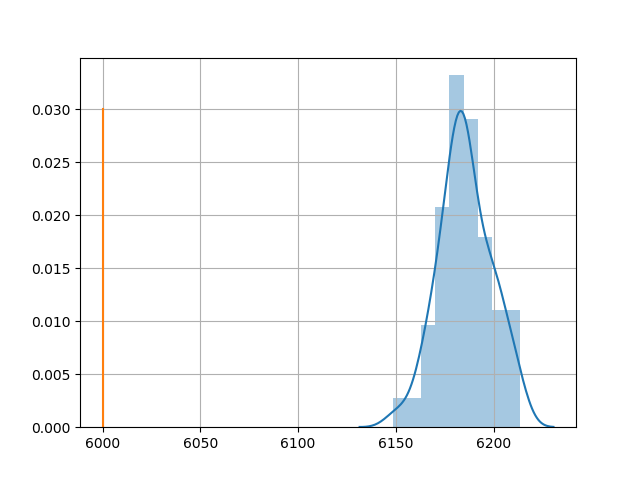

In [191]:
plt.figure()
plt.grid()
sns.distplot(score_list)
plt.plot([6000]*10, np.linspace(0, 0.03, num=10))

### Задание 4

#### Единственное решение
$\begin{cases}
-y - 0.6x \rightarrow min \\
y+x \leq 0.5 \\
y-x\leq 0 \\
x \geq 0.2
\end{cases}$

$\begin{cases}
-y - 0.6x \rightarrow min \\
y + x + x_1 = 0.5 \\
y - x + x_2 = 0 \\
x - x_3 = 0.2
\end{cases}$

<IPython.core.display.Javascript object>


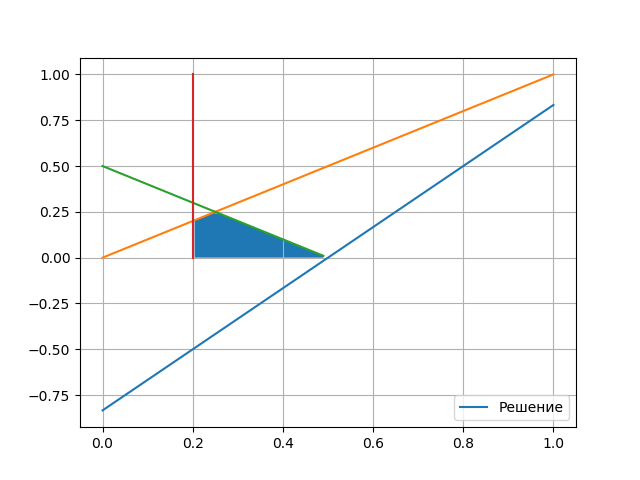

     fun: -0.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.5, 0. , 0.3])
  status: 0
 success: True
       x: array([0.5, 0. ])

In [190]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.5-x
f3 = 0.2

plt.grid()
plt.plot(x, 10*x/6-10/12)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[np.logical_and(f3<=x, x<=0.5)],
                         0,
                         np.min(np.array([x[np.logical_and(f3 <x, x<=0.5)],
                         (1/2-x)[np.logical_and(0.2<=x, x<=0.5)]]), axis=0));
plt.legend(['Решение'])
linprog([-1, -0.6], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.2])

#### бесконечное ножество решений

$\begin{cases}
-y-x \rightarrow min \\
y+x \leq 0.5 \\
y-x\leq 0 \\
x \geq 0.2
\end{cases}$

$\begin{cases}
-y - x \rightarrow min \\
y + x + x_1 = 0.5 \\
y - x + x_2 = 0 \\
x - x_3 = 0.2
\end{cases}$

<IPython.core.display.Javascript object>


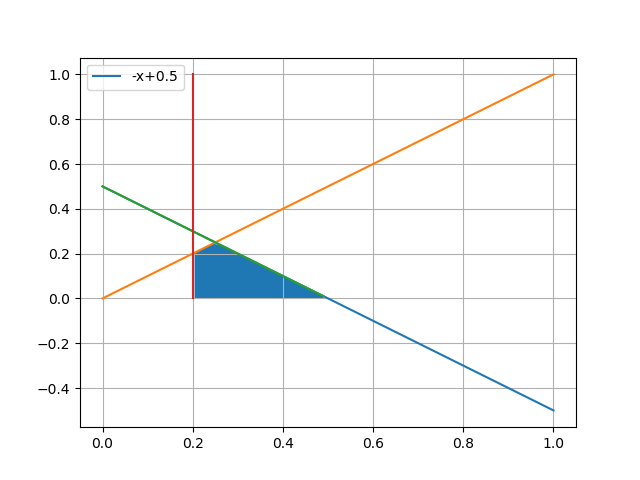

     fun: -0.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.  , 0.  , 0.05])
  status: 0
 success: True
       x: array([0.25, 0.25])

In [67]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.5-x
f3 = 0.2

plt.grid()
plt.plot(x, -x+0.5)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[np.logical_and(f3<x, x<0.5)],
                         0,
                         np.min(np.array([x[np.logical_and(f3 <x, x<0.5)],
                         (1/2-x)[np.logical_and(0.2<x, x<0.5)]]), axis=0));
plt.legend(['-x+0.5'])
linprog([-1, -1], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.2])

####  допустимая область пуста


$\begin{cases}
-y-x \rightarrow min \\
y+x \leq 0.5 \\
y-x\leq 0 \\
x \geq 0.51
\end{cases}$

$\begin{cases}
-y - x \rightarrow min \\
y + x + x_1 = 0.5 \\
y - x + x_2 = 0 \\
x - x_3 = 0.51
\end{cases}$

<IPython.core.display.Javascript object>


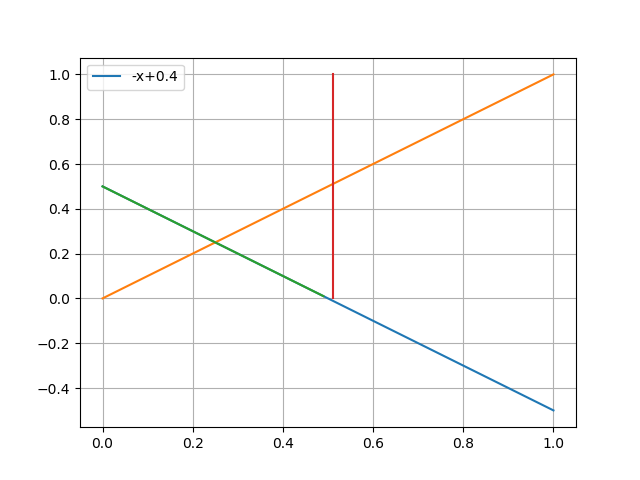

     fun: 0.010000000000000009
 message: 'Optimization failed. Unable to find a feasible starting point.'
     nit: 1
  status: 2
 success: False
       x: nan

In [243]:
fig = plt.figure()
x = np.linspace(0, 1, 50)

f1 = x
f2 = 0.5-x
f3 = 0.51

plt.grid()
plt.plot(x, -x+0.5)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
plt.legend(['-x+0.4'])
linprog([-1, -1], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.51])

#### функция не ограничена в заданной области

$\begin{cases}
-y-x \rightarrow min \\
y+x \leq 0.5 \\
y-0.2x\geq 0 \\
x \geq 0.2
\end{cases}$

$\begin{cases}
-y - x \rightarrow min \\
y + x + x_1 = 0.5 \\
y + 0.2x + x_2 = 0 \\
x - x_3 = 0.2
\end{cases}$

<IPython.core.display.Javascript object>


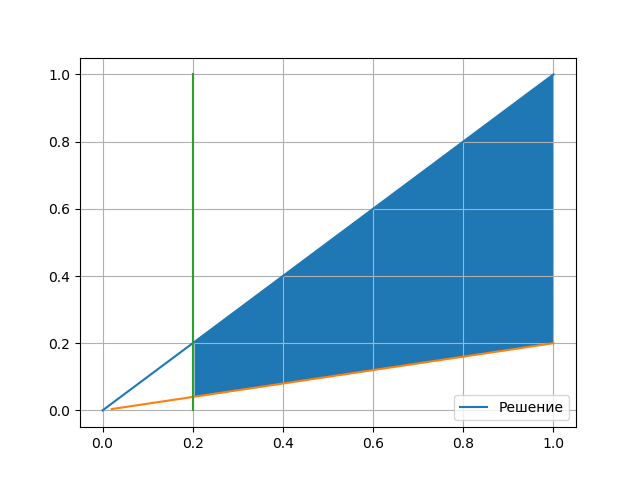

     fun: -1.25
 message: 'Optimization failed. The problem appears to be unbounded.'
     nit: 3
   slack: array([0.   , 0.   , 0.425])
  status: 3
 success: False
       x: array([0.625, 0.625])

In [192]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.2*x
f3 = 0.2

plt.grid()
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[x>=f3],
                         f1[x>=f3],
                         f2[x>=f3]);
plt.legend(['Решение'])
linprog([-1, -1], [[-1, 1], [-0.2, 1], [-1, 0]], [0, 0.5, -0.2])

### Задание 5

Задание 4. Используя команду linprog решите следующие задачи линейного программирования(найти максимум и минимум целевой функции)для неотрицательных переменных х

1. $\begin{cases} 
f = 3x_1+2x_2 \\
x_1 + 2x_2\leq 7 \\
2x_1 + x_2 \leq 8 \\ 
x_2\leq 3 \end{cases}$

1. $\begin{cases} 
f = x_1+2x_2 \\
x_!2 + 2x_2\leq 7 \\
2x_1 + x_2 \leq 8 \\ 
x_2\leq 3 
x_1 + 2x_2 \leq 2\end{cases}$

1. $\begin{cases} 
f = -x_1-2x_2 \\
x_1 + x_2 \leq 1 \\
\end{cases}$


Используя графический метод решения задачи линейного программирования найдите решение и подтвердите ответы.

Усложните условия первых двух задач, преобразовав ограничения в виде ограничений равенств и смешанные (неравенства и равенства). Естественно размерность задачи возрастет.


<IPython.core.display.Javascript object>


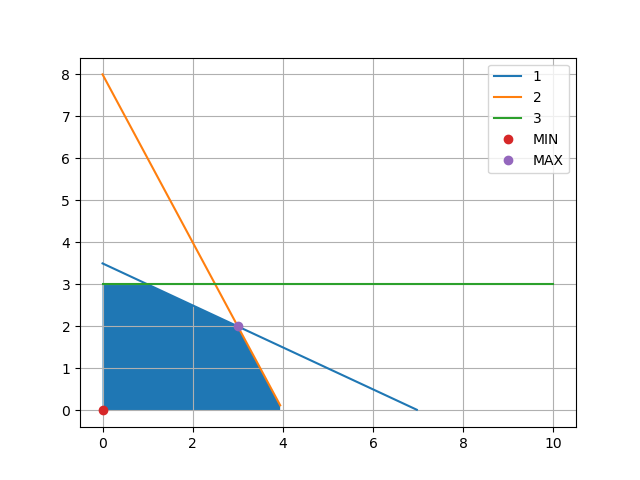

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([7., 8., 3.])
  status: 0
 success: True
       x: array([0., 0.])


     fun: -13.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 1.])
  status: 0
 success: True
       x: array([3., 2.])

In [262]:
x = np.linspace(0,10, 100)
f1 = (7-x)/2
f2 = 8-2*x
fig = plt.figure()
plt.grid()
plt.plot(x[f1>=0], f1[f1>=0])
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(x, [3]*100)
fig.axes[0].fill_between(x[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0],
                         0,
                         np.minimum(f1,
    np.minimum(f2, np.array([3]*100)))[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0])
plt.plot(0,0,'o')
plt.plot(3,2,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([3,2], [[1,2], [2,1], [0,1]], [7,8,3]))
linprog([-3, -2], [[1,2], [2,1], [0,1]], [7,8,3])

In [282]:
x = np.linspace(0,10, 100)
print(linprog([3,2,0,0,0], [[1,2,1,0,0], [2,1,0,1,0], [0,1,0,0,1]], [7,8,3]))
linprog([-3, -2, 0, 0, 0], [[1, 2, 1, 0, 0], [2, 1, 0, 1, 0], [0, 1, 0, 0 ,1]], [7, 8, 3])

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([7., 8., 3.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0.])


     fun: -13.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 1.])
  status: 0
 success: True
       x: array([3., 2., 0., 0., 0.])

<IPython.core.display.Javascript object>


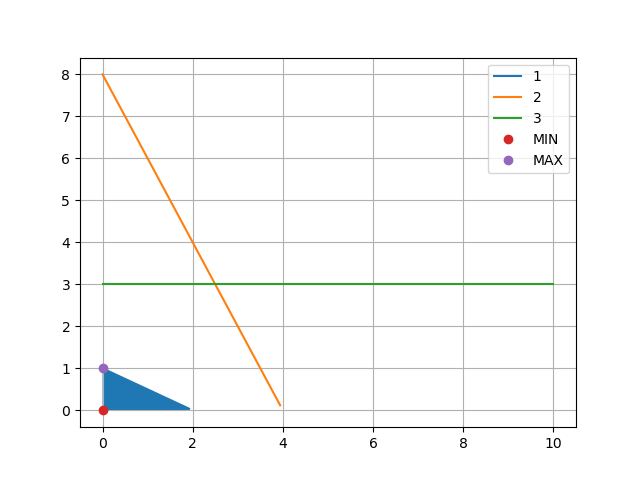

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([2., 8., 3.])
  status: 0
 success: True
       x: array([0., 0.])


     fun: -2.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0., 7., 2.])
  status: 0
 success: True
       x: array([0., 1.])

In [270]:
x = np.linspace(0,10, 100)
f1 = (2-x)/2
f2 = 8-2*x
fig = plt.figure()
plt.grid()
plt.plot(x[f1>=0], f1[f1>=0])
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(x, [3]*100)
fig.axes[0].fill_between(x[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0],
                         0,
                         np.minimum(f1,
    np.minimum(f2, np.array([3]*100)))[np.minimum(f1, np.minimum(f2, np.array([3]*100)))>=0])
plt.plot(0,0,'o')
plt.plot(0,1,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([1,2], [[1,2], [2,1], [0,1]], [2,8,3]))
linprog([-1, -2], [[1,2], [2,1], [0,1]], [2,8,3])

<IPython.core.display.Javascript object>


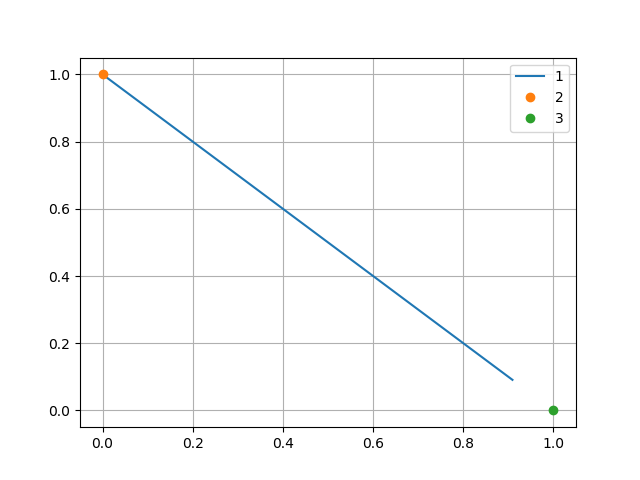

     fun: -2.0
 message: 'Optimization failed. The problem appears to be unbounded.'
     nit: 2
   slack: array([0.])
  status: 3
 success: False
       x: array([0., 1.])


     fun: 1.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([0.])
  status: 0
 success: True
       x: array([1., 0.])

In [277]:
x = np.linspace(0,10, 100)
f2 = 1-x
fig = plt.figure()
plt.grid()
plt.plot(x[f2>=0], f2[f2>=0])
plt.plot(0,1,'o')
plt.plot(1,0,'o')
plt.legend(['1','2','3', "MIN", 'MAX'])
print(linprog([-1, -2], [[-1,-1]], [-1]))
linprog([1, 2], [[-1,-1]], [-1])